In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Get data

In [85]:
df = pd.read_csv('/content/BMW_Car_Sales_Classification.csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


**Feature Description**

* **Model** : BMW car model (e.g., X1, X3, 5 Series, i8, M3)

* **Year** : Manufacturing year (2010–2024)

* **Region** : Geographic sales region (e.g., North America, Europe, Asia)

* **Color** : Exterior car color


* Fuel_Type Type of fuel used: Petrol, Diesel, Hybrid, or Electric
* Transmission Gear transmission type: Manual or Automatic
* Engine_Size_L Engine capacity in liters (1.5L–5.0L)
* Mileage_KM Vehicle mileage (in kilometers)
* Price_USD Price in US Dollars
* Sales_Volume Total units sold in the given region & year
* Sales_Classification Classification label: High or Low sales (based on volume threshold)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [87]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [88]:
df.describe(include = 'object')

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification
count,50000,50000,50000,50000,50000,50000
unique,11,6,6,4,2,2
top,7 Series,Asia,Red,Hybrid,Manual,Low
freq,4666,8454,8463,12716,25154,34754


# Data Visualization to get insight

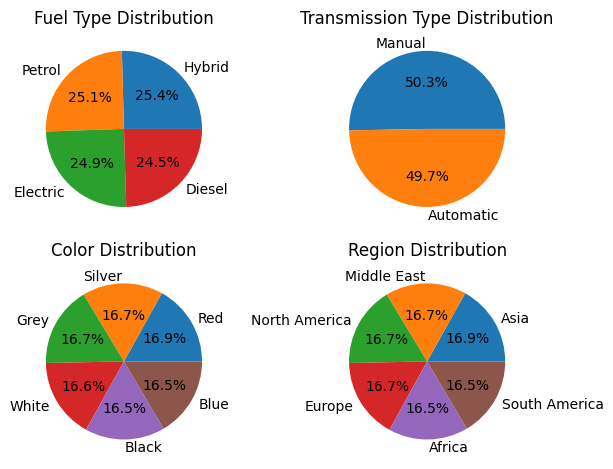

In [89]:
plt.subplot(2,2,1)
plt.pie(df['Fuel_Type'].value_counts(), labels = df['Fuel_Type'].value_counts().index, autopct = '%1.1f%%')
plt.title('Fuel Type Distribution')

plt.subplot(2,2,2)
plt.pie(df['Transmission'].value_counts(), labels = df['Transmission'].value_counts().index, autopct = '%1.1f%%')
plt.title('Transmission Type Distribution')

plt.subplot(2,2,3)
plt.pie(df['Color'].value_counts(), labels = df['Color'].value_counts().index, autopct = '%1.1f%%')
plt.title('Color Distribution')

plt.subplot(2,2,4)
plt.pie(df['Region'].value_counts(), labels = df['Region'].value_counts().index, autopct = '%1.1f%%')
plt.title('Region Distribution')

plt.tight_layout()
plt.show()

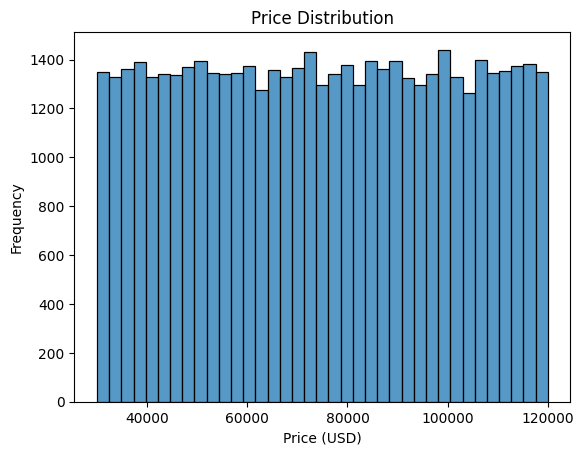

In [90]:
sns.histplot(df['Price_USD'], bins = 'auto')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

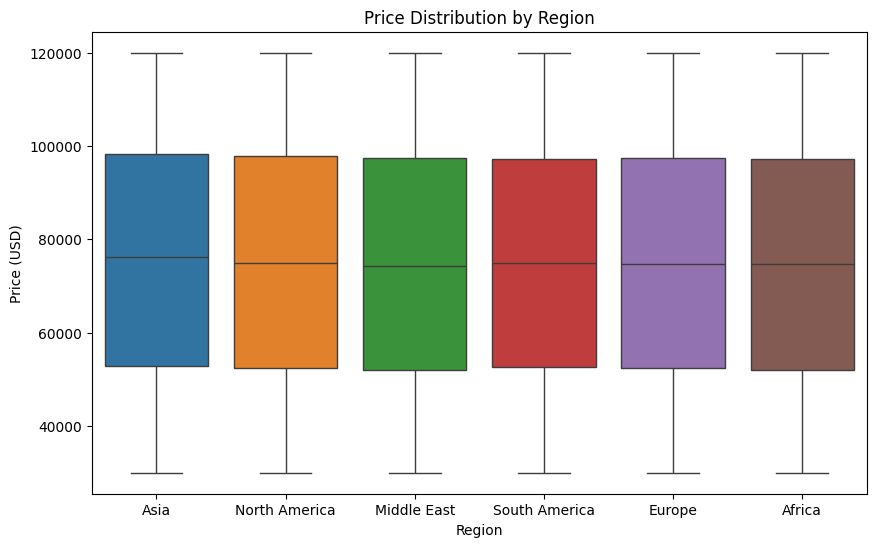

In [91]:
plt.figure(figsize = (10, 6))
sns.boxplot(df, x = 'Region', y = 'Price_USD', hue = 'Region')
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price (USD)')
plt.show()

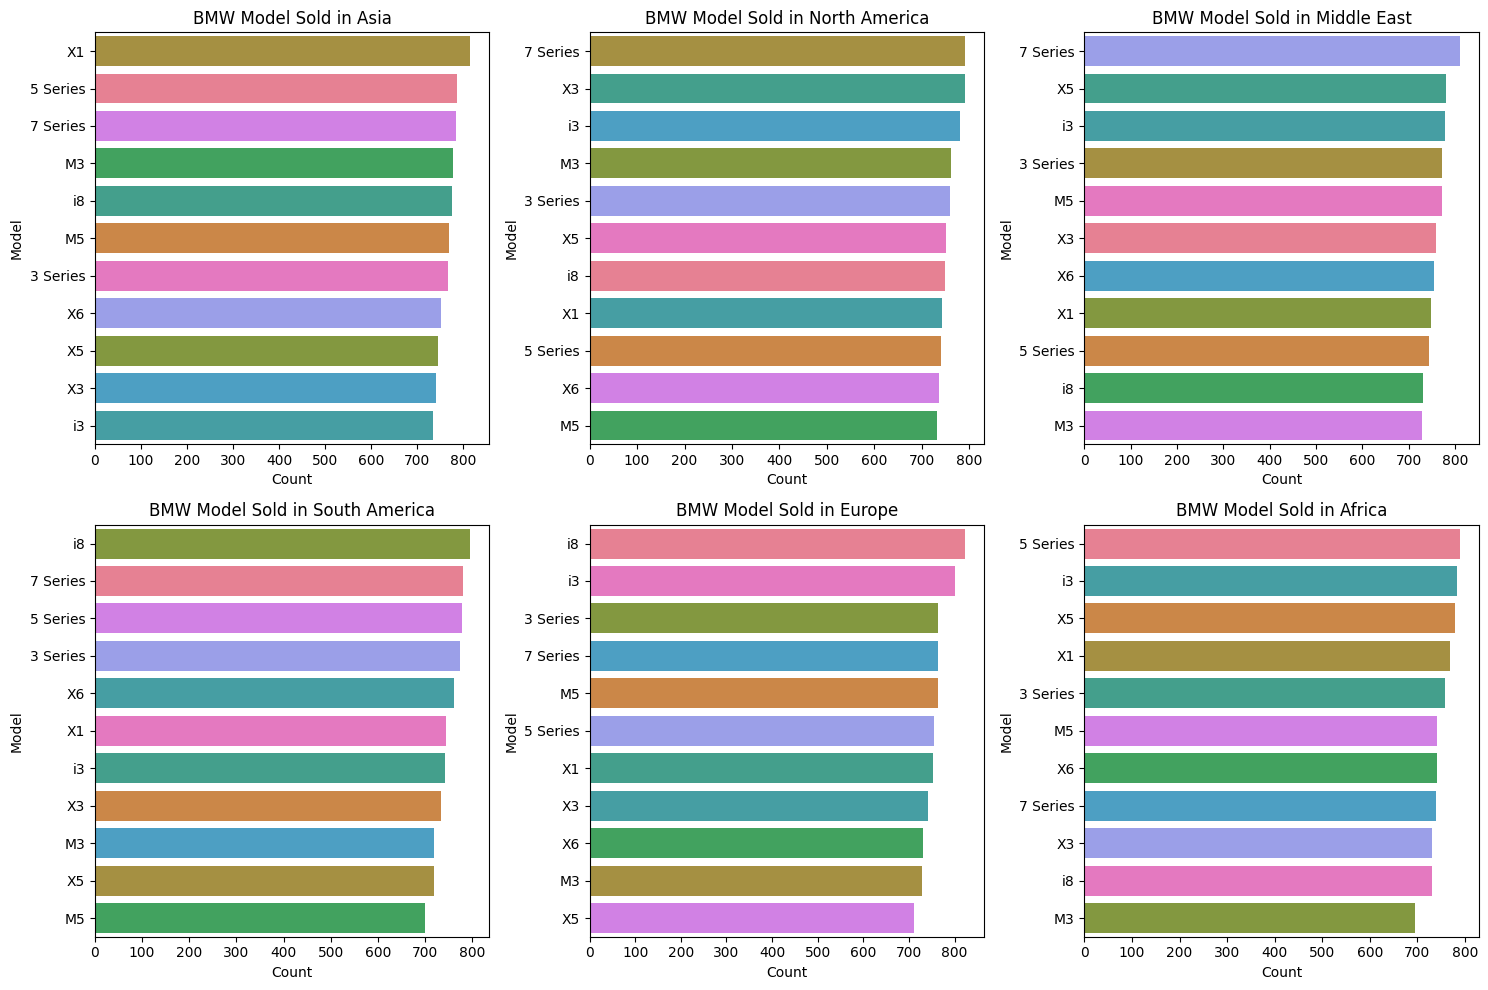

In [92]:
fig, axes = plt.subplots (2, 3, figsize = (15, 10))

order_asia = df[df['Region']== 'Asia']['Model'].value_counts(ascending= False).index
order_na = df[df['Region']== 'North America']['Model'].value_counts(ascending= False).index
order_me = df[df['Region']== 'Middle East']['Model'].value_counts(ascending= False).index
order_sa = df[df['Region']== 'South America']['Model'].value_counts(ascending= False).index
order_eu = df[df['Region']== 'Europe']['Model'].value_counts(ascending= False).index
order_af = df[df['Region']== 'Africa']['Model'].value_counts(ascending= False).index

#BMW model sold in Asia
sns.countplot(df[df['Region']== 'Asia'], y = 'Model', ax = axes[0,0], hue = 'Model',
              order = order_asia)
axes[0,0].set_title('BMW Model Sold in Asia')
axes[0,0].set_xlabel('Count')
axes[0,0].set_ylabel('Model')

#BMW model sold in North America
sns.countplot(df[df['Region']== 'North America'], y = 'Model', ax = axes[0,1], hue = 'Model',
              order = order_na)
axes[0,1].set_title('BMW Model Sold in North America')
axes[0,1].set_xlabel('Count')
axes[0,1].set_ylabel('Model')

#BMW model sold in Middle East
sns.countplot(df[df['Region']== 'Middle East'], y = 'Model', ax = axes[0,2], hue = 'Model',
              order = order_me)
axes[0,2].set_title('BMW Model Sold in Middle East')
axes[0,2].set_xlabel('Count')
axes[0,2].set_ylabel('Model')

#BMW model sold in South America
sns.countplot(df[df['Region']== 'South America'], y = 'Model', ax = axes[1,0], hue = 'Model',
              order = order_sa)
axes[1,0].set_title('BMW Model Sold in South America')
axes[1,0].set_xlabel('Count')
axes[1,0].set_ylabel('Model')

#BMW model sold in Europe
sns.countplot(df[df['Region']== 'Europe'], y = 'Model', ax = axes[1,1], hue = 'Model',
              order = order_eu)
axes[1,1].set_title('BMW Model Sold in Europe')
axes[1,1].set_xlabel('Count')
axes[1,1].set_ylabel('Model')

#BWM model sold in Africa
sns.countplot(df[df['Region']== 'Africa'], y = 'Model', ax = axes[1,2], hue = 'Model',
              order = order_af)
axes[1,2].set_title('BMW Model Sold in Africa')
axes[1,2].set_xlabel('Count')
axes[1,2].set_ylabel('Model')

plt.tight_layout()
plt.show()

In [93]:
sales_volume_byRegion = df.groupby('Region')['Sales_Volume'].sum().reset_index()
sales_volume_byRegion.sort_values(by = 'Sales_Volume', ascending = False, inplace = True)
sales_volume_byRegion

,Region,Sales_Volume
1,Asia,42974277
2,Europe,42555138
4,North America,42402629
3,Middle East,42326620
0,Africa,41565252
5,South America,41551818


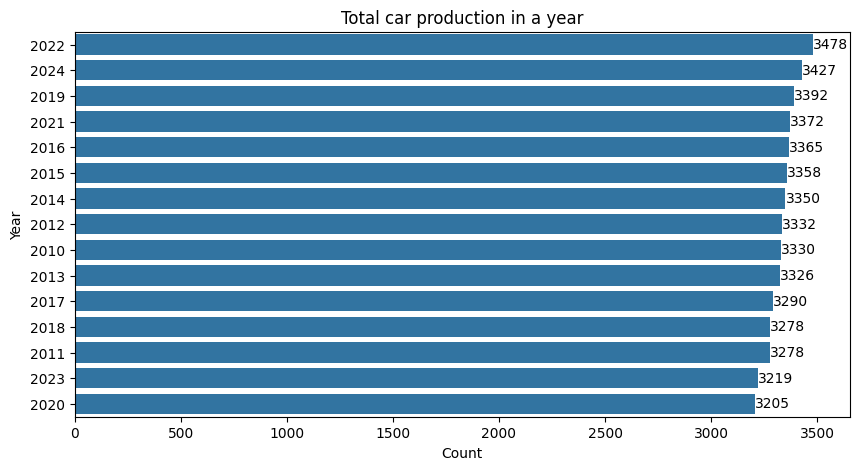

In [94]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(data=df, y='Year', order= df['Year'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Total car production in a year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

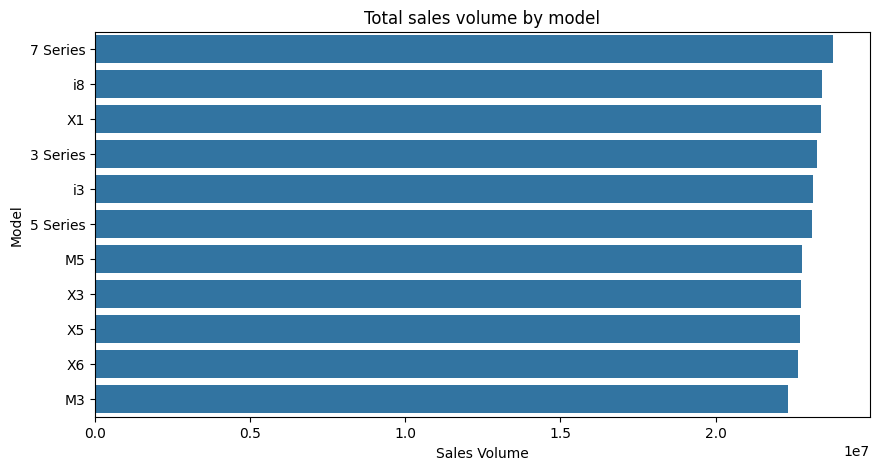

In [95]:
sales_volume_byModel = df.groupby('Model')['Sales_Volume'].sum().reset_index()
sales_volume_byModel.sort_values(by = 'Sales_Volume', ascending = False, inplace = True)

plt.figure(figsize = (10, 5))
ax = sns.barplot(sales_volume_byModel, y = 'Model', x = 'Sales_Volume', order = sales_volume_byModel['Model'])
plt.title('Total sales volume by model')
plt.xlabel('Sales Volume')
plt.ylabel('Model')
plt.show()

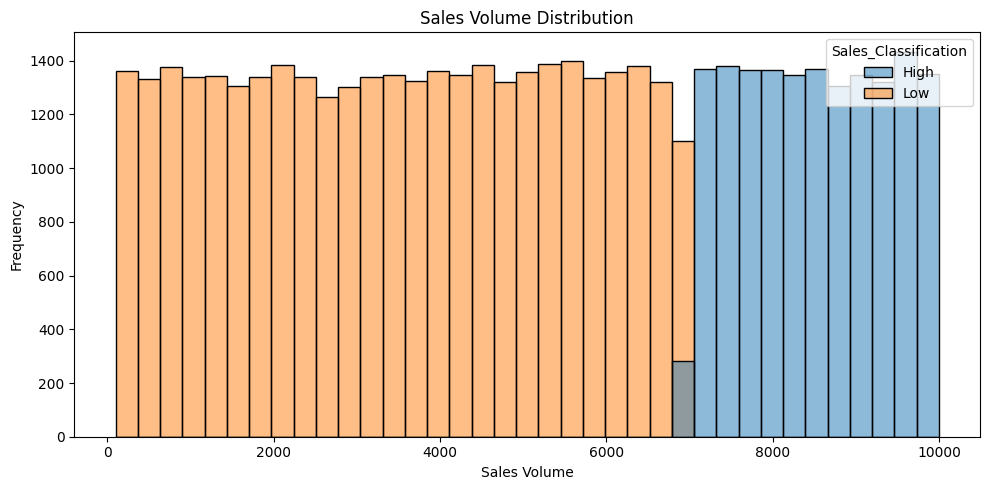

In [97]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = 'Sales_Volume', bins = 'auto', hue = 'Sales_Classification' )
plt.title('Sales Volume Distribution')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Encode categorical data

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1


<Axes: >

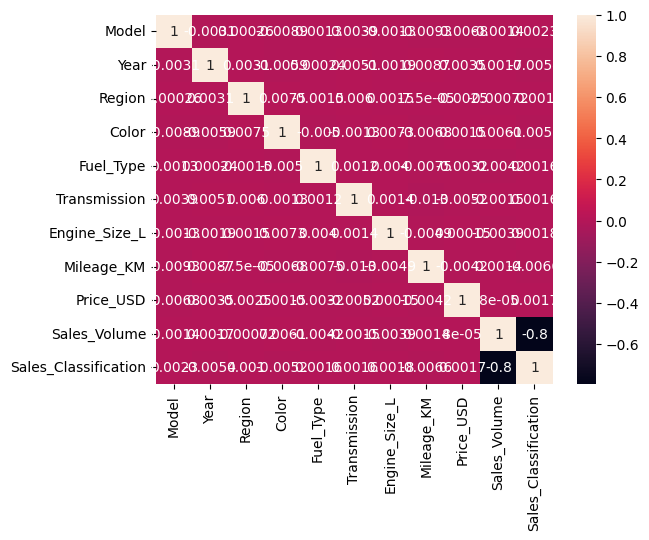

In [99]:
sns.heatmap(df.corr(), annot = True)

In [110]:
df['Sales_Classification'].value_counts()

,count
Sales_Classification,
1,34754
0,15246


# Build Machine learning model


*   Random forest
*   Logistic regression with SMOTE (no scaling)
*   Logistic Regression without SMOTE (no scaling)
*   Logistic regression with feat scaling
*   SVM




In [100]:
X = df.drop(['Sales_Classification'], axis = 1)
y = df['Sales_Classification']

In [101]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [102]:
# build randomforest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [103]:
# USE SMOTE due to imbalance data
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)
smote_pred = model_smote.predict(X_test)


In [104]:
# logistic regression without SMOTE
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

In [106]:
# logistic regression with feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_clf_scaled = LogisticRegression()
lr_clf_scaled.fit(X_train_scaled, y_train)
lr_pred_scaled = lr_clf_scaled.predict(X_test_scaled)

In [108]:
# build SVM model
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf')
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)

In [111]:
# Model evaluation

def evaluation (y_test, y_pred, label):
  print(f"\n Evaluation result: {label}")
  print (accuracy_score(y_test, y_pred)*100)
  print (classification_report(y_test, y_pred))
  print (confusion_matrix(y_test, y_pred))

evaluation (y_test, rf_pred, 'Random Forest')
evaluation (y_test, smote_pred, 'Logistic regression with SMOTE')
evaluation(y_test, lr_pred, 'Logistic regression without SMOTE')
evaluation(y_test, lr_pred_scaled, 'Logistic regression with feature scaling')
evaluation(y_test, svm_pred, 'SVM')


 Evaluation result: Random Forest
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

[[3032    0]
 [   0 6968]]

 Evaluation result: Logistic regression with SMOTE
99.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

[[3025    7]
 [   3 6965]]

 Evaluation result: Logistic regression without SMOTE
99.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00  

# Conclusion
This project presents a comparative analysis of classification models applied to an imbalanced sales dataset, with the target variable distinguishing between high and low sales volume. The modeling pipeline includes:
- Baseline Random Forest with class weighting to handle class imbalance.
- Logistic Regression with and without Synthetic Minority Over-sampling Technique (SMOTE).
- Feature Scaling using StandardScaler to evaluate its impact on model performance.
Key findings:
- Random Forest performed consistently with perfect classification (100% accuracy), suggesting strong separability in feature space and robustness against imbalance.
- Logistic Regression, despite being sensitive to feature scaling, also achieved near-perfect scores. Performance improved slightly after scaling, reducing misclassifications in both majority and minority classes.
- SMOTE successfully rebalanced the training data and maintained high precision and recall for the minority class without compromising overall performance.
- Support Vector Machine (SVM) demonstrated strong performance with an accuracy of 99.46%. The model misclassified slightly more instances than Random Forest or Logistic Regression, but maintained high precision and recall across both classes. This shows that SVM—with proper scaling—can serve as a reliable alternative in high-dimensional, balanced pipelines.


Overall, this project demonstrates effective strategies for handling class imbalance, the practical role of feature scaling, and the importance of robust evaluation metrics such as confusion matrix, F1-score, and ROC-AUC. It also showcases how ensemble and linear models respond to different preprocessing techniques.
